In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv('fraudTrain.csv')

In [3]:
data2 = pd.read_csv('fraudTest.csv')

In [4]:
data1

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [5]:
data2

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [6]:
data1.shape

(1296675, 23)

In [7]:
data2.shape

(555719, 23)

In [8]:
data = pd.concat([data1,data2], axis=0)

In [9]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [10]:
data.shape

(1852394, 23)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud               i

In [12]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [13]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [14]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [15]:
data['is_fraud'].value_counts()

is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [16]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [17]:
data.isnull().sum().sum()

0

In [18]:
data.duplicated().sum()

0

In [19]:
data.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [20]:
data.drop(columns = 'Unnamed: 0',inplace = True)

In [21]:
data.drop('first',axis = 1,inplace = True)

In [22]:
data.drop(columns = 'last',inplace = True)

In [23]:
data.drop(columns = 'street',inplace = True)

In [24]:
data.drop(columns = 'city',inplace = True)

In [25]:
data.drop(columns = 'job',inplace = True)

In [26]:
data.drop(columns = 'merchant',inplace = True)

In [27]:
data.drop(columns = 'state',inplace = True)

In [28]:
data.drop(columns = 'trans_num',inplace = True)

In [29]:
data

,trans_date_trans_time,cc_num,category,amt,gender,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,misc_net,4.97,F,28654,36.0788,-81.1781,3495,1988-03-09,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,99160,48.8878,-118.2105,149,1978-06-21,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,entertainment,220.11,M,83252,42.1808,-112.2620,4154,1962-01-19,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,gas_transport,45.00,M,59632,46.2306,-112.1138,1939,1967-01-12,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,misc_pos,41.96,M,24433,38.4207,-79.4629,99,1986-03-28,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,health_fitness,43.77,M,63453,40.4931,-91.8912,519,1966-02-13,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,kids_pets,111.84,M,77566,29.0393,-95.4401,28739,1999-12-27,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,kids_pets,86.88,F,99323,46.1966,-118.9017,3684,1981-11-29,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,travel,7.99,M,83643,44.6255,-116.4493,129,1965-12-15,1388534364,44.470525,-117.080888,0


In [30]:
data.dtypes

trans_date_trans_time     object
cc_num                     int64
category                  object
amt                      float64
gender                    object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
dob                       object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [31]:
data.drop(columns = 'cc_num',inplace = True)

In [32]:
data['gender'] = data['gender'].map({'M':1,'F':0})

In [33]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [34]:
data['pdate_ordinal']= data['trans_date_trans_time'].apply(lambda date: date.toordinal())

In [35]:
data.drop(columns = 'dob',inplace = True)

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
label_en = LabelEncoder()

In [38]:
encoded = label_en.fit_transform(data['category'])

In [39]:
print(encoded)

[ 8  4  0 ...  7 13  0]


In [40]:
data.drop('trans_date_trans_time',axis = 1,inplace = True)

In [41]:
data.drop('category',axis = 1,inplace = True)

In [42]:
data.dtypes

amt              float64
gender             int64
zip                int64
lat              float64
long             float64
city_pop           int64
unix_time          int64
merch_lat        float64
merch_long       float64
is_fraud           int64
pdate_ordinal      int64
dtype: object

In [43]:
data.drop(columns = 'column_name',inplace = True)

KeyError: "['column_name'] not found in axis"

In [52]:
data

,amt,gender,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,pdate_ordinal
0,4.97,0,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,737060
1,107.23,0,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,737060
2,220.11,1,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,737060
3,45.00,1,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,737060
4,41.96,1,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,737060
...,...,...,...,...,...,...,...,...,...,...,...
555714,43.77,1,63453,40.4931,-91.8912,519,1388534347,39.946837,-91.333331,0,737790
555715,111.84,1,77566,29.0393,-95.4401,28739,1388534349,29.661049,-96.186633,0,737790
555716,86.88,0,99323,46.1966,-118.9017,3684,1388534355,46.658340,-119.715054,0,737790
555717,7.99,1,83643,44.6255,-116.4493,129,1388534364,44.470525,-117.080888,0,737790


In [54]:
data.columns

Index(['amt', 'gender', 'zip', 'lat', 'long', 'city_pop', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'pdate_ordinal'],
      dtype='object')

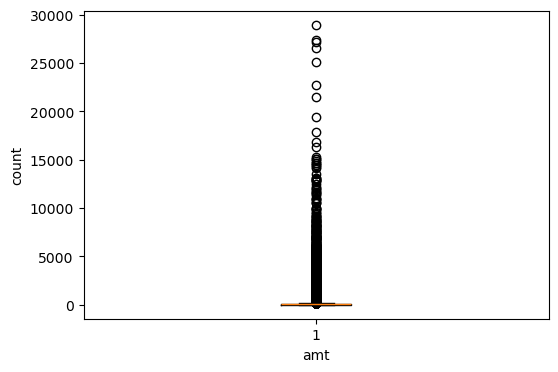

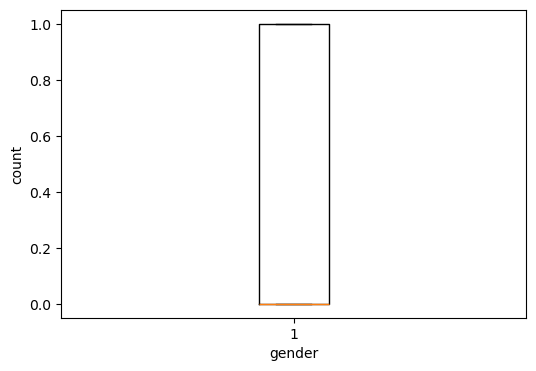

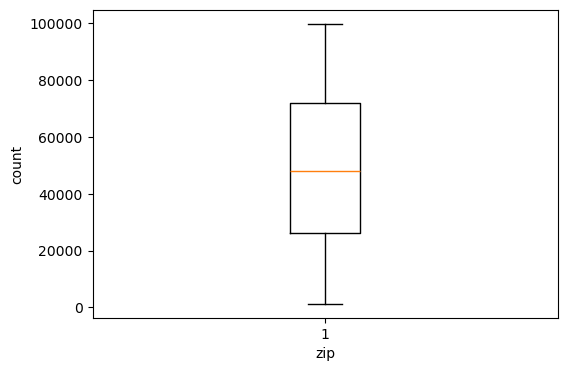

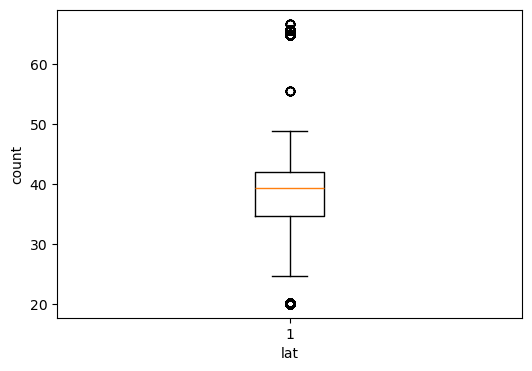

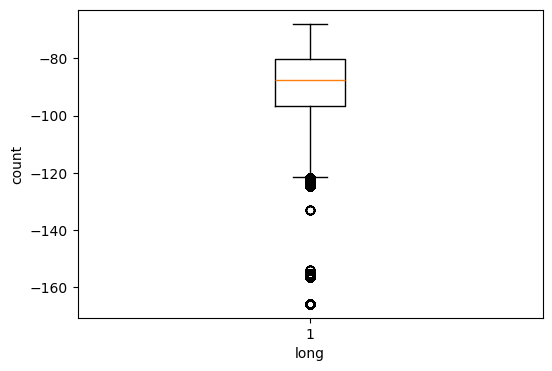

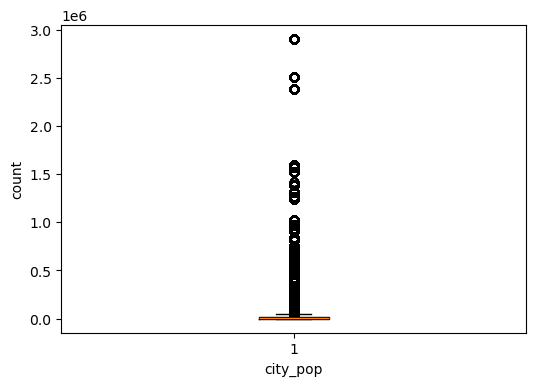

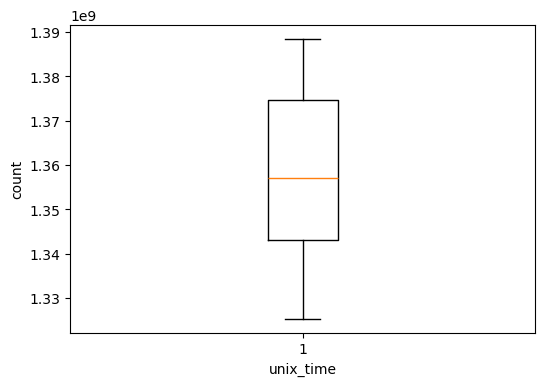

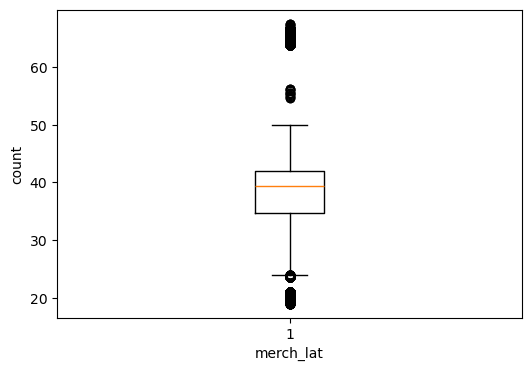

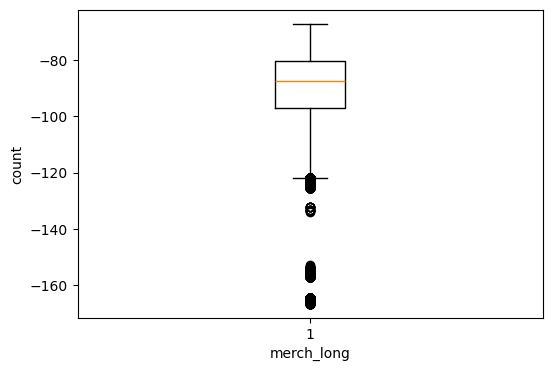

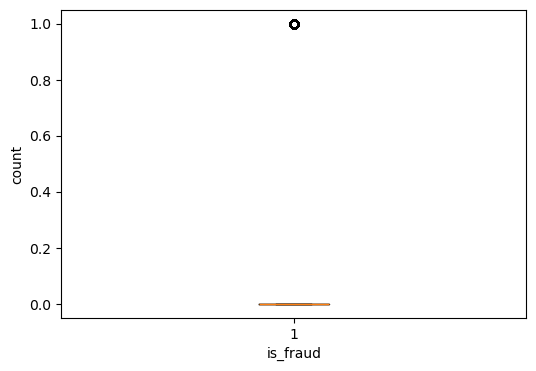

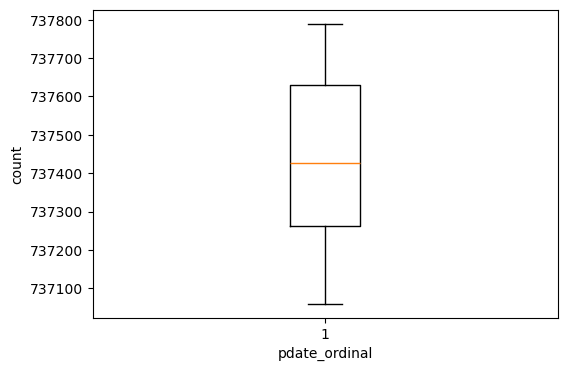

In [56]:
for i in data.columns:
    if data[i].dtypes != 'object':
        plt.figure(figsize=(6,4))
        plt.boxplot(x=data[i])
        plt.xlabel(i)
        plt.ylabel('count')
        plt.show()

In [58]:
def find_outliers(data, threshold=3):
    mean = np.mean(data)
    std = np.std(data)

    outliers= []

    for i in data:
        z_score = (i - mean) / std
        if np.abs(z_score) > threshold:
            outliers.append(i)

    return outliers
    
# Loop over all numeric columns and apply the Z-score method
outliers_info = {}

for col in data.columns:
    if col != 'label':  # Assuming 'label' is not used for outlier detection
        outliers = find_outliers(data[col])
        
        # Store the number of outliers and the percentage of data they represent
        outlier_count = len(outliers)
        total_data_points = len(data[col])
        outlier_percentage = (outlier_count / total_data_points) * 100
        
        outliers_info[col] = {
            'outlier_count': outlier_count,
            'outlier_percentage': outlier_percentage,
            'outliers': outliers
        }

# Display the outliers and their percentages
for col, info in outliers_info.items():
    print(f"Column: {col}")
    print(f"Outlier Count: {info['outlier_count']}")
    print(f"Outlier Percentage: {info['outlier_percentage']:.2f}%")

Column: amt
Outlier Count: 17846
Outlier Percentage: 0.96%
Column: gender
Outlier Count: 0
Outlier Percentage: 0.00%
Column: zip
Outlier Count: 0
Outlier Percentage: 0.00%
Column: lat
Outlier Count: 6612
Outlier Percentage: 0.36%
Column: long
Outlier Count: 6612
Outlier Percentage: 0.36%
Column: city_pop
Outlier Count: 46860
Outlier Percentage: 2.53%
Column: unix_time
Outlier Count: 0
Outlier Percentage: 0.00%
Column: merch_lat
Outlier Count: 6612
Outlier Percentage: 0.36%
Column: merch_long
Outlier Count: 6612
Outlier Percentage: 0.36%
Column: is_fraud
Outlier Count: 9651
Outlier Percentage: 0.52%
Column: pdate_ordinal
Outlier Count: 0
Outlier Percentage: 0.00%


In [60]:
X=data.drop(columns = 'is_fraud')
y=data['is_fraud']

In [62]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X, y, stratify = y,test_size = 0.22,random_state = 42)

#### standard_scalar

In [66]:
from sklearn.preprocessing import StandardScaler

In [69]:
std = StandardScaler()

In [71]:
X_train = std.fit_transform(X_train)

In [73]:
X_test = std.transform(X_test)

In [75]:
X_train

array([[-0.42818598,  1.09970653, -0.22794863, ..., -0.34924418,
         0.32321536, -0.99735953],
       [-0.12071333,  1.09970653,  0.81442224, ..., -1.74794102,
         0.00745852, -0.53750176],
       [ 0.14424396,  1.09970653,  1.02419822, ..., -0.82536979,
        -0.6830721 , -0.80298666],
       ...,
       [-0.42971348,  1.09970653, -0.5969535 , ..., -1.85644168,
         0.66757319,  0.86103476],
       [ 0.50422436, -0.90933351,  1.14255055, ..., -0.97963766,
        -0.72785978, -0.90254349],
       [-0.43054087,  1.09970653, -1.23755131, ...,  0.24705642,
         0.79553999, -0.85513547]])

In [77]:
X_test

array([[-0.40514622,  1.09970653, -0.51255959, ..., -1.06081238,
         0.22750437, -1.01632273],
       [-0.26162504,  1.09970653, -1.75871816, ...,  0.71074044,
         1.33620583,  0.7093291 ],
       [ 0.59001884, -0.90933351, -1.10394931, ...,  0.27117256,
         1.12061289,  0.66192108],
       ...,
       [ 0.01949827, -0.90933351, -0.70716028, ..., -1.06640483,
         0.59902181, -1.29128923],
       [-0.1226227 , -0.90933351,  0.03962732, ...,  1.63396302,
         0.20760282, -1.28654843],
       [-0.34945618,  1.09970653, -0.37449426, ..., -0.86296026,
        -0.02056383,  1.21185408]])

#### Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [82]:
lgr = LogisticRegression()

In [84]:
lgr.fit(X_train, y_train)

LogisticRegression()

In [85]:
y_pred = lgr.predict(X_test)

In [86]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import accuracy_score

In [92]:
accuracy_score(y_pred, y_test)

0.9943439330400194

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    407345
           1       0.00      0.00      0.00       182

    accuracy                           0.99    407527
   macro avg       0.50      0.50      0.50    407527
weighted avg       1.00      0.99      1.00    407527



#### Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier

In [104]:
dtc = DecisionTreeClassifier()

In [106]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [112]:
y_predd = dtc.predict(X_test)

In [114]:
y_predd

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [116]:
accuracy_score(y_predd, y_test)

0.993651954349037

In [118]:
print(classification_report(y_predd, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    405175
           1       0.44      0.40      0.42      2352

    accuracy                           0.99    407527
   macro avg       0.72      0.70      0.71    407527
weighted avg       0.99      0.99      0.99    407527



In [120]:
param_dist={
    "criterion":["gini","Entropy"],
    "max_depth":[1,2,3,4,5,6,7,8,9,10,20]
}

In [122]:
from sklearn.model_selection import GridSearchCV

In [124]:
grid=GridSearchCV(dtc,param_grid=param_dist,cv=10,n_jobs=-1)

In [126]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'Entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20]})

In [128]:
grid.best_score_

0.9952410846689077

In [130]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 7}